# Bayesian Linear Regression: 
## Linear Regression with Uncertainty

Ransalu Senanayake

 ------------------------------------------------------------------------------------------------------------------
 
 Reference:  
* Slide 1-26 of the lecture on [Variational Inference](https://drive.google.com/file/d/12ExYzb6pW0vjmfCr_vGA8h1QORfhWpvI/view)
* Christopher Bishop's *Pattern Recognition and Machine Learning* Section 3.

We start the tutorial with an introduction to simple linear regression. In simple linear regression, the parameters (weights) are deteministic. We then introduce probability distributions over parameters and perform Bayesian linear regression. Because of these distributions, uncertainty (i.e. variance) of the fitted line can be estimated. 

In [1]:
import numpy as np
import matplotlib.pyplot as pl

## 1. Simple Linear Regression

Let us consider a dataset.

There are N=13 datapoints and D=1 dimensions in X.


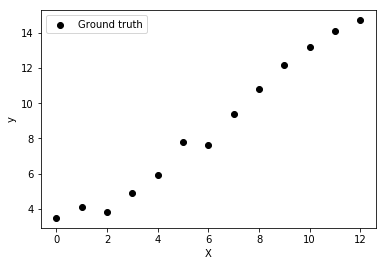

In [2]:
# Generate data
y = np.array([3.5, 4.1, 3.8, 4.9, 5.9, 7.8, 7.6, 9.4, 10.8, 12.2, 13.2, 14.1, 14.7])[:,np.newaxis]
X = np.arange(y.shape[0])[:,np.newaxis]

# Get dimensionality
(N, D) = X.shape
print("There are N={} datapoints and D={} dimensions in X.".format(N, D))

# Plot
pl.scatter(X, y, c='k', label='Ground truth')
pl.xlabel('X')
pl.ylabel('y')
pl.legend();

Our objective is to fit a model. Linear regression is a good choice here. 

***Objective***: Estimate (a.k.a. predict or query) outputs for unknown inputs, given the training data $\{X,\mathbf{y}\}$.

Let us assume the relationship between input and output can be modelled by,
\begin{equation}
y \approx f(x) = w_0 +  w_1 x
\end{equation}

If $w_0$ and $w_1$ are known, it is possible to calculate $y$ for any unknown $x$. Our objective is to determine the "best" $w_0$ and $w_1$ values using training data $\{X,\mathbf{y}\}$.

More generally, if X is $D-$dimensional,

\begin{equation}
y = w_0 +  w_1 x^{(1)} + w_2 x^{(3)} + w_3 x^{(3)} + ... + w_p x^{(D)},
\end{equation}

where $^{(d)}$ indicates the $d-$th dimension of $X$ for $d=1,\dots,D$. Here, all $w_d$ values have to be estimated. 


***Method***:
For each sample in the training dataset $\{x_i, y_i\}_{i=1}^{N}$,
\begin{equation}
y_i = (w_0 +  w_1 x_i^{(1)} + w_2 x_i^{(2)} + w_3 x_i^{(3)} + ... + w_p x_i^{(D)})  + e_i.
\end{equation}

where $e_i = (y_i - \hat{y}_i)$ is the error between *actual* and *estimated* outputs for a given choice of $w_d$ values.

This can also be represented as,

\begin{equation}
\underbrace{
\begin{bmatrix}
y_1 \\
y_2 \\
y_3 \\
\vdots \\
y_N
\end{bmatrix} 
}_{ \color{gray}{N\times 1} }
=
\underbrace{
 \begin{bmatrix}
  1 & x_1^{(1)} & \cdots & x_1^{(D)} \\
  1 & x_2^{(1)} & \cdots & x_2^{(D)} \\
  1 & x_3^{(1)} & \cdots & x_3^{(D)} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  1 & x_N^{(1)} & \cdots & x_N^{(D)}
 \end{bmatrix} 
}_{ \color{gray}{N\times (D+1)} }
\underbrace{
 \begin{bmatrix}
  w_0 \\
  w_1 \\
  \vdots \\ 
  w_D 
 \end{bmatrix}
}_{ \color{gray}{(D+1)\times 1} }
 +
\underbrace{
\begin{bmatrix}
e_1 \\
e_2 \\
e_3 \\
\vdots \\
e_N
\end{bmatrix}
}_{ \color{gray}{N\times 1} }
\end{equation}

For simplicity, let us denote the same model as,

\begin{equation}
 \mathbf{y} = \Phi_X\mathbf{w} + \mathbf{e}.
\end{equation}

If error $\mathbf{e}$ is negligible, $\mathbf{y} \approx \Phi_X\mathbf{w}$. Based on ordinary least square (OLS) method or maximum likelihood estimation (MLE) under the assumption of normally distributed error, we can cosider this as a minimization problem in the following form.
\begin{equation}
 \hat{\mathbf{w}} = \underset{\mathbf{w}}{\operatorname{argmin}} \| \Phi_X\mathbf{w - y}\|_2^2
\end{equation}
It can be shown that $\mathbf{e}$ is minimum if $\mathbf{w}$ is selected (let us call it $\hat{\mathbf{w}}$) as,
\begin{equation}
\boxed{
  \hat{\mathbf{w}} = (\Phi_X^{\top}\Phi_X)^{-1}\Phi_X^{\top}\mathbf{y}
  }
\end{equation}


Now, $\mathbf{\hat{y}}$ can be estimated for unknown $\Phi_{X_q}$ based on,
\begin{equation}
 \mathbf{\hat{y}} = \Phi_{X_q}\mathbf{\hat{w}}
\end{equation}

Let's add the intercept term first. It is appending data matrix with a vector of ones.

In [3]:
# A function to add an extra column of ones
def add_intercept(X):
    return np.hstack((np.ones(X.shape), X))

ϕ_X = add_intercept(X)

In [4]:
print("ϕ_X is D+1={} dimensional.".format(ϕ_X.shape[1]))

ϕ_X is D+1=2 dimensional.


In [5]:
w_hat = (np.linalg.pinv(ϕ_X.T.dot(ϕ_X))).dot(ϕ_X.T.dot(y))
print('w_hat=\n', w_hat)

"""
Attention! - use np.linalg.pinv instead of np.linalg.inv. 
This is because, when a matrix is singular, we may have to obtain the Moore-Penrose pseudoinverse,
especially when the polynomial order is very high. 
"""

w_hat=
 [[2.41428571]
 [1.03351648]]


'\nAttention! - use np.linalg.pinv instead of np.linalg.inv. \nThis is because, when a matrix is singular, we may have to obtain the Moore-Penrose pseudoinverse,\nespecially when the polynomial order is very high. \n'

Generate 100 query inputs $\mathbf{X}_q$ from $-1$ to $12$. Add the intercept term. 

In [6]:
X_q = np.linspace(-1,12,100)[:,np.newaxis] 
ϕ_X_q = add_intercept(X_q)

**Predict:** 
Evaluate $\mathbf{\Phi_{x_q}}$ and hence determine outputs $\hat{\mathbf{y}}$.

In [7]:
y_hat = ϕ_X_q.dot(w_hat) #estimated outputs (N_qx1 matrix)

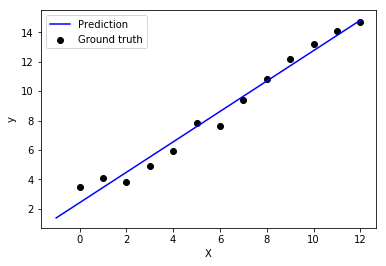

In [8]:
pl.scatter(X, y, c='k', label='Ground truth')
pl.plot(X_q, y_hat, c='b', label='Prediction')
pl.xlabel('X')
pl.ylabel('y')
pl.legend();

Additional notes:

Other than the intercept term, we can consider polynomial features, RBF features, etc. to capture nonlinear patterns. 

Tikhonov ($\mathrm{L}^2$) regularization can be used to overcome overfitting when D is large. 

\begin{equation}
  \hat{\mathbf{w}} = (\mathbf{\Phi_x}^{\top}\mathbf{\Phi_x} + \gamma \mathbf{I})^{-1}\mathbf{\Phi_x^{\top} y}
\end{equation}

In other words, we can cosider this as a minimization problem in the following form.
\begin{equation}
 \hat{\mathbf{w}} = \underset{\mathbf{w}}{\operatorname{argmin}} \| \mathbf{\Phi_x w - y}\|_2^2
 + \gamma \| \mathbf{w} \|_2^2
\end{equation}

## 2. Bayesian Linear Regression

#### Recap: Bayes Rule

Let us start with an example. 0.4% of a population is having a particular genetic disorder. In order to test the disorder, a person has undergone a medical test which has a **sensitivity** of 80% (if a person has the disorder, the test result will be positive with a probability of 0.8) and a **false alarm** of 10%. If the test is positive, what is the probability of person the having the particular genetic disorder?

Answer:

\begin{equation}
    p(Y=y|X=x) = \frac{p(X=x|Y=y) p(Y=y)}{\sum_{y'} p(X=x|Y=y')p(Y=y')}
\end{equation}

Let $x=1$ be positive test results and $x=0$ be negative test results.

Let $y=1$ be the person has a cancer and $y=0$ be the person does not have a cancer.

* prior: $p(Y=1) = 0.004$ and $p(Y=0) = 1-0.004 = 0.996$

* sensitivity: $p(X=1|Y=1) = 0.8$

* false positive/alarm: $p(X=1|Y=0) = 0.1$

\begin{equation}
    p(Y=1|X=1) = \frac{p(X=1|Y=1) p(Y=1)}{p(X=1|Y=1)p(Y=1)+p(X=1|Y=0)p(Y=0)} 
    = \frac{0.8 \times 0.004}{0.8 \times 0.004 + 0.1 \times 0.996}
    = 0.0311 \approx 3\%
\end{equation}

### Bayesian Linear regression

Refer Christopher Bishop's *Pattern Recognition and Machine Learning* Section 3.3.

\begin{equation}
    \underbrace{p(\mathbf{w},|\mathbf{x,y})}_\text{posterior} 
    = \frac{
    	\overbrace{p(\mathbf{y} \vert \mathbf{x,w})}^\text{likelihood} 
        \times 
        \overbrace{p(\mathbf{w})}^\text{prior}
         } 
    {\underbrace{p(\mathbf{y})}_\text{marginal likelihood}}
\end{equation}


Considering $y = f(x) + e$ for $e \sim \mathcal{N}(0, \beta^{-1})$, the **likelihood** is $p(\mathbf{y} \vert \mathbf{x,w},\beta) = \mathcal{N}(\Phi_X \mathbf{w},\beta^{-1}\mathbf{I})$ where $\beta$ is the noise precision (precision is defined as the reciprocal of variance).

Let us consider a Gaussian **prior** $p(\mathbf{w}) = \mathcal{N} (\mathbf{w} \vert \mathbf{m}_0, \mathbf{S}_0)$ with $\mathbf{m}_0=\mathbf{0}$ and $\mathbf{S}_0 = \alpha^{-1} \mathbf{I}$. This is a zero mean Gaussian with an $\alpha$ precision).

Then, the **posterior** is $p(\mathbf{w\vert y}) = \mathcal{N} (\mathbf{w} \lvert \mathbf{m}_N, \mathbf{S}_N),$

where
\begin{equation}
\boxed{
\mathbf{m_N} = \beta \mathbf{S}_N \mathbf{\Phi_x^\top y}
}
\end{equation}
and 
\begin{equation}
\boxed{
\mathbf{S}_N = {( \alpha \mathbf{I} + \beta \mathbf{\Phi_x}^\top \mathbf{\Phi_x} )}^{-1}
}.
\end{equation}

In [9]:
from scipy.stats import multivariate_normal

Let us define a zero mean Gaussian prior with a small precision. A small precision leads to a wider distribution (i.e. higher uncertainty). 

In [10]:
# Prior distribution
alpha = 2**-1 # prior precision - should be small
m_0 = np.zeros((D+1,1))
S_0 = 1/alpha*np.eye(D+1)
prior = multivariate_normal(m_0[:,0], S_0)

Let's compute the posterior distribution. 

In [11]:
# Posterior distribution
beta = 1**0 # noise precision - should be large
S_N = np.linalg.pinv(alpha*np.eye((D+1)) + beta*ϕ_X.T.dot(ϕ_X))
m_N = beta*S_N.dot(ϕ_X.T.dot(y))
posterior = multivariate_normal(m_N[:,0], S_N)

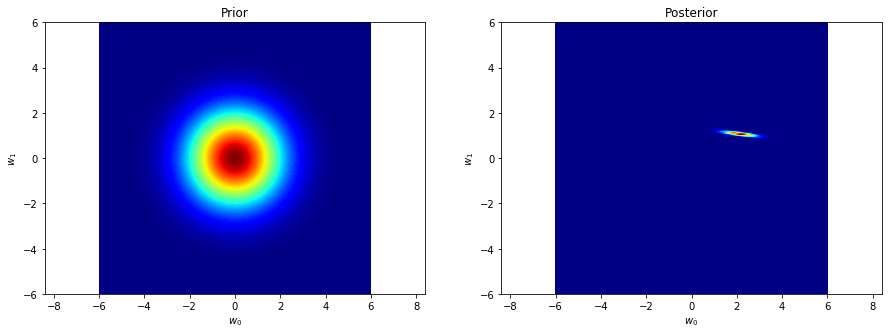

In [13]:
# Plot
xx, yy = np.meshgrid(np.linspace(-6, 6, 200), np.linspace(-6, 6, 200))
ww = np.vstack((xx.ravel(), yy.ravel())).T

prior_pdf = prior.pdf(ww)
posterior_pdf = posterior.pdf(ww)

fig, ax = pl.subplots(1,2, figsize=(15,5))
ax[0].contourf(xx, yy, prior_pdf.reshape(xx.shape), levels=100, cmap='jet'); ax[0].axis('equal'); ax[0].set_title('Prior'); ax[0].set_xlabel('$w_0$'); ax[0].set_ylabel('$w_1$')
ax[1].contourf(xx, yy, posterior_pdf.reshape(xx.shape), levels=100, cmap='jet'); ax[1].axis('equal'); ax[1].set_title('Posterior'); ax[1].set_xlabel('$w_0$'); ax[1].set_ylabel('$w_1$');

Although we started with a broad (more uncertain) prior, the resulting posterior distribution is much narrower (more certian). Let us obtain 5 samples from the prior and posterior weight distributions and make predictions.

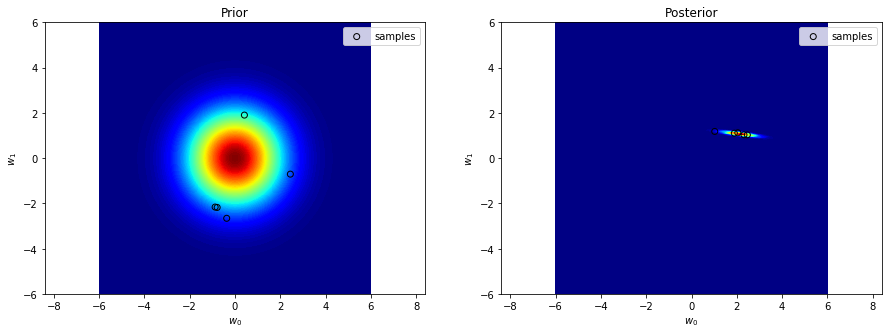

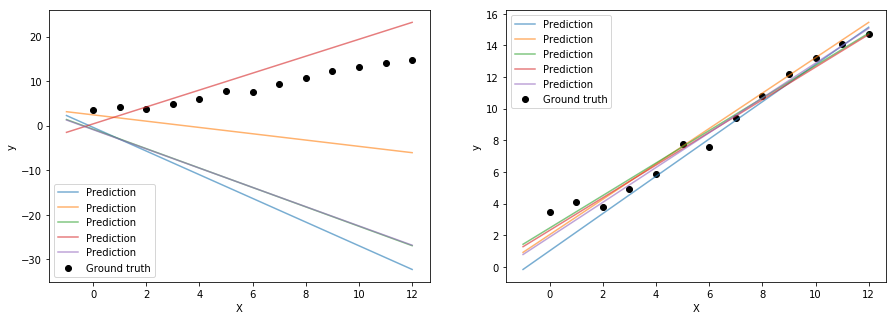

In [16]:
# Query points
X_q = np.linspace(-1,12,100)[:,np.newaxis] 
ϕ_X_q = add_intercept(X_q)

# Sample weights from the prior and predict
N_lines = 5
w_0 = multivariate_normal.rvs(m_0[:,0], S_0, size=N_lines).T
y_hat_0 = ϕ_X_q.dot(w_0) #estimated outputs (N_qxN_lines matrix)

# Sample weights from the posterior and predict
w_N = multivariate_normal.rvs(m_N[:,0], S_N, size=N_lines).T
y_hat_N = ϕ_X_q.dot(w_N) #estimated outputs (N_qxN_lines matrix)

# Plot samples
fig, ax = pl.subplots(1,2, figsize=(15,5))
ax[0].contourf(xx, yy, prior_pdf.reshape(xx.shape), levels=100, cmap='jet'); ax[0].axis('equal'); ax[0].set_title('Prior'); ax[0].set_xlabel('$w_0$'); ax[0].set_ylabel('$w_1$')
ax[0].scatter(w_0[0,:], w_0[1,:], c='', edgecolor='k', label='samples'); ax[0].legend()
ax[1].contourf(xx, yy, posterior_pdf.reshape(xx.shape), levels=100, cmap='jet'); ax[1].axis('equal'); ax[1].set_title('Posterior'); ax[1].set_xlabel('$w_0$'); ax[1].set_ylabel('$w_1$');
ax[1].scatter(w_N[0,:], w_N[1,:], c='', edgecolor='k', label='samples'); ax[1].legend()

# Plot
fig, ax = pl.subplots(1,2, figsize=(15,5))
ax[0].scatter(X, y, c='k', label='Ground truth')
ax[0].plot(X_q, y_hat_0, alpha=0.6, label='Prediction')
ax[0].set_xlabel('X'); ax[0].set_ylabel('y'); ax[0].legend()
ax[1].scatter(X, y, c='k', label='Ground truth')
ax[1].plot(X_q, y_hat_N, alpha=0.6, label='Prediction')
ax[1].set_xlabel('X'); ax[1].set_ylabel('y'); ax[1].legend();

The mean and variance of predictions can be obtained by obtaining a large number of samples from the posterior distribution. Alternatively, the posterior pedictive distribution can be analytically represented as,
$$p(y \lvert x_q, \mathbf{x, y}, \alpha, \beta) = \mathcal{N}(\mu_q, \sigma^2_q) \text{ with } \mu_q = \mathbf{\Phi_{x_q}}\mathbf{m}_N \text{ and }
\sigma^2_q = \beta^{-1} + \mathbf{\Phi_{x_q}} \mathbf{S}_N \mathbf{\Phi_{x_q}^\top}.$$

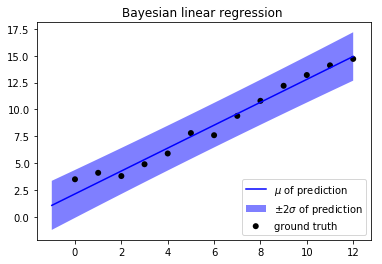

In [17]:
# Posterior predictive distributions
mu_q = ϕ_X_q.dot(m_N)
sigma_q = np.sqrt(1/beta + np.diag(ϕ_X_q.dot(S_N.dot(ϕ_X_q.T))))[:,None]

# Plot
pl.fill_between(X_q.ravel(), np.ravel(mu_q-2*sigma_q), np.ravel(mu_q+2*sigma_q),\
                facecolor='blue', interpolate=True, alpha=0.5, label=r'$±2\sigma$ of prediction')
pl.scatter(X, y, c='k', label='ground truth', edgecolors='')
pl.plot(X_q, mu_q, c='b', label=r'$\mu$ of prediction')
pl.legend(loc='lower right')
pl.title('Bayesian linear regression ');

**Sequential Bayesian Linear Regression**: Consider the problem of adding data points sequentially. In the following demonstration, we start with a broad prior and add one data point at a time. In each step after the first step, the prior is initialized as the posterior from the previous step (i.e. the posterior in step $i$ is used as the prior for step $i+1$.). We can see how the posterior converges with more data. Refer Figure 3.7 of Bishop's *Pattern Recognition and Machine Learning*.

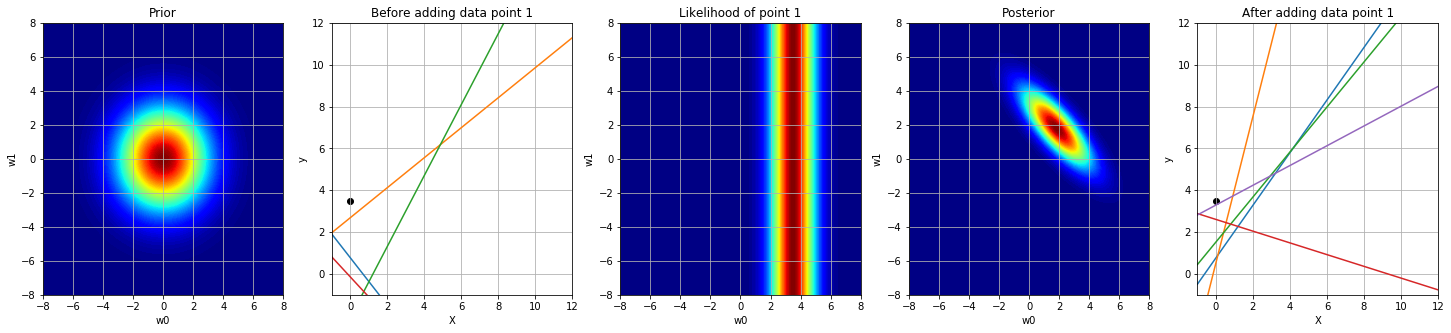

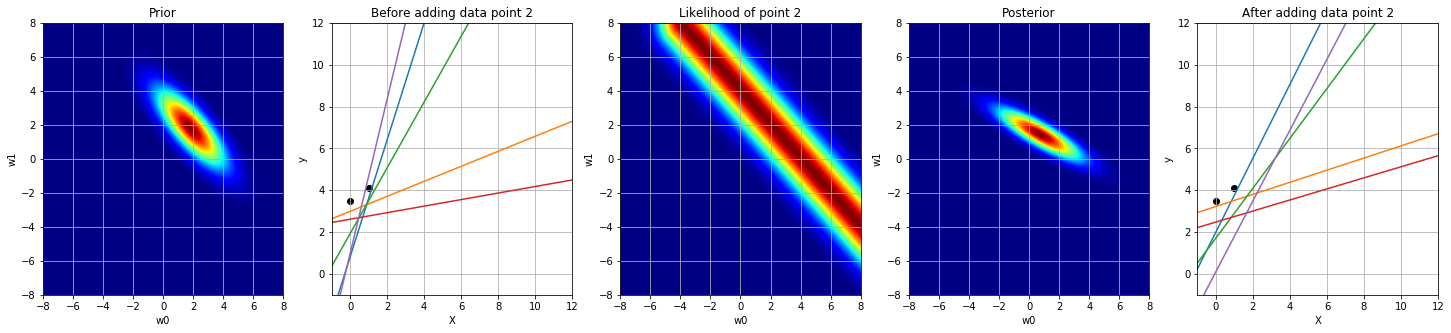

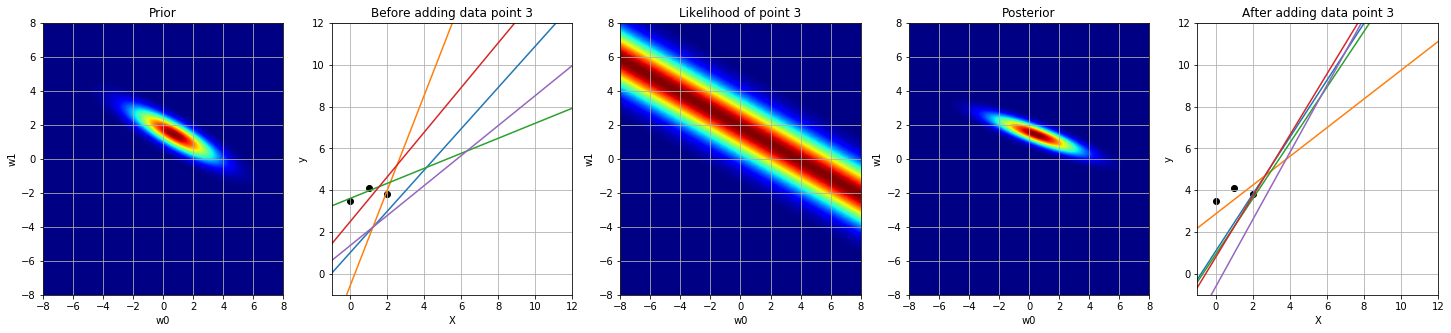

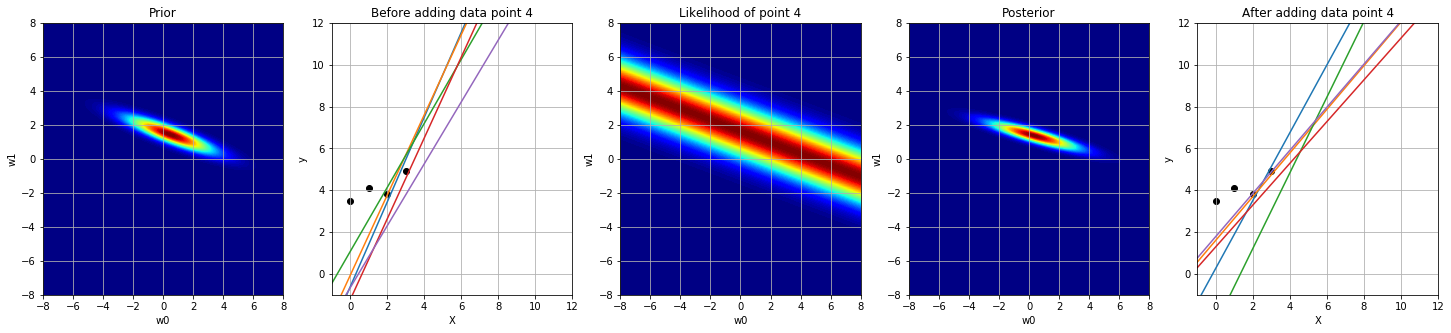

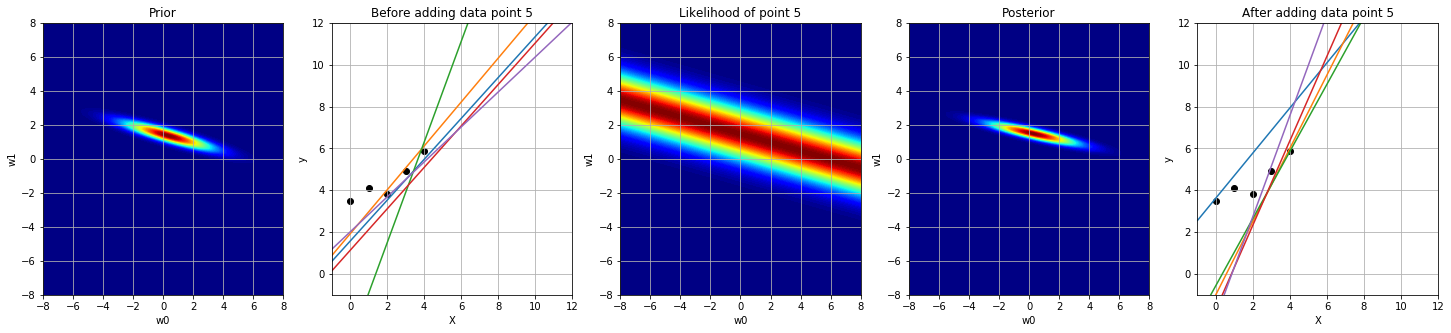

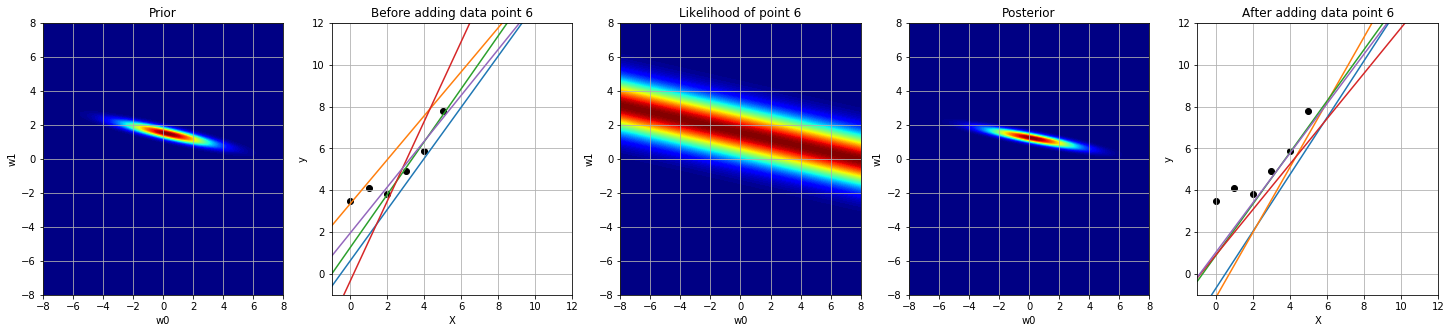

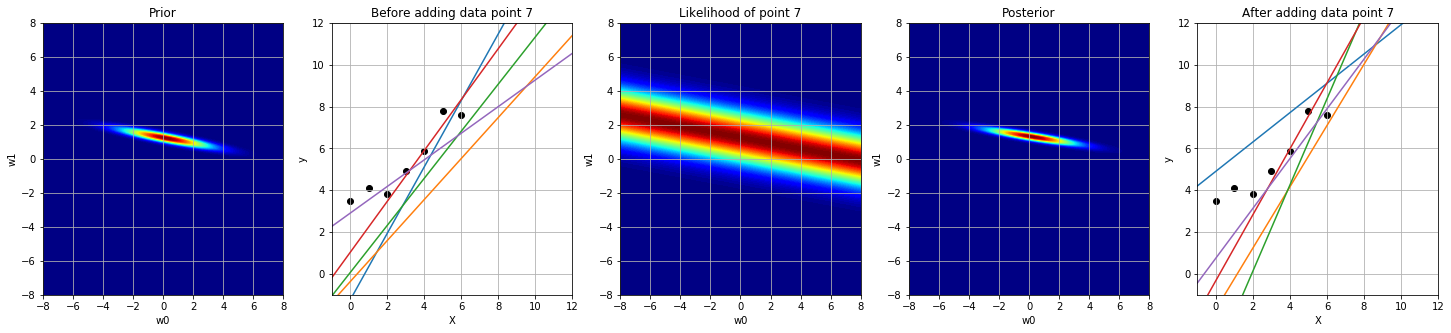

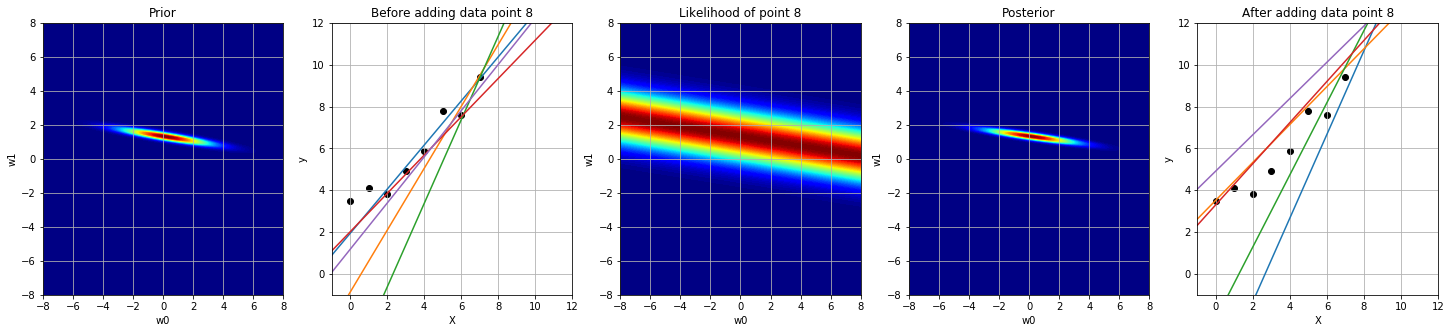

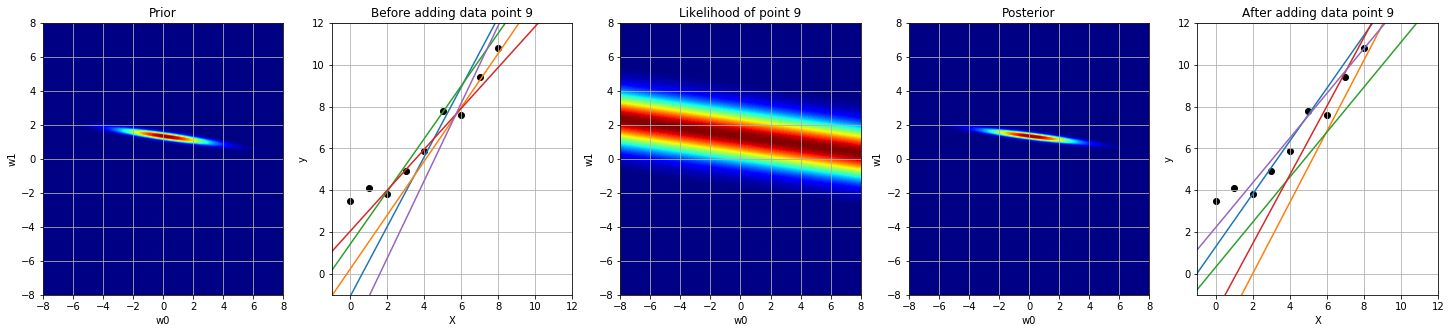

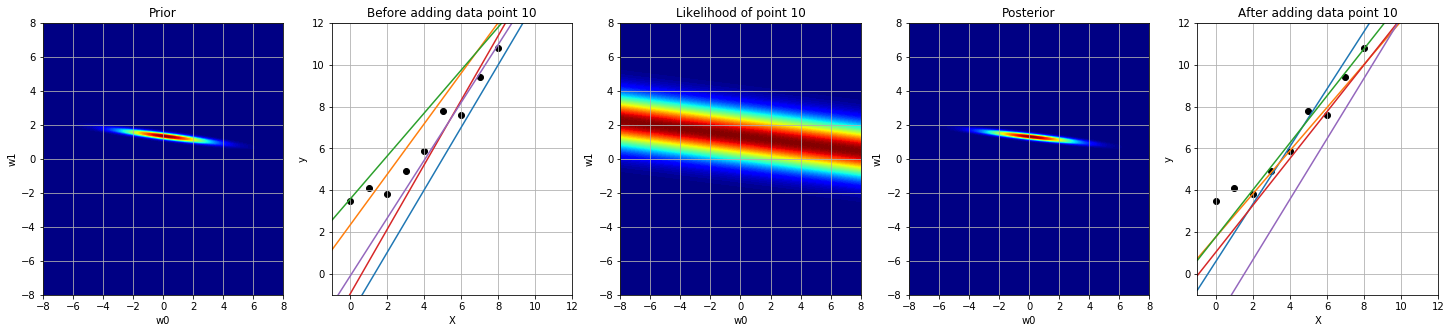

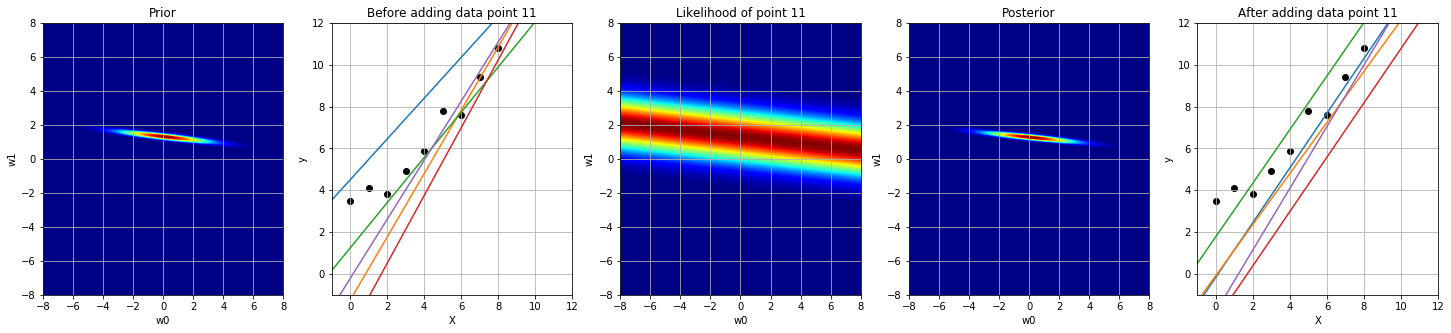

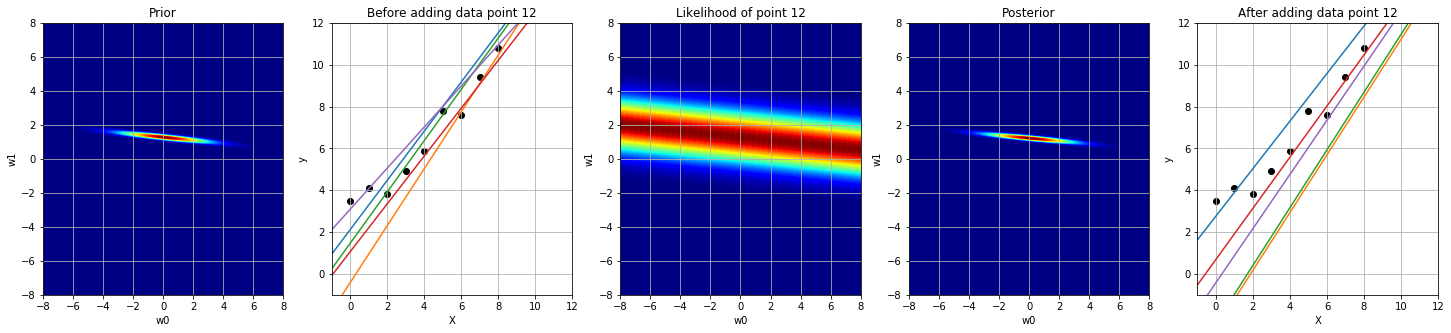

In [56]:
# Initial parameters
alpha = 2**-2 # prior precision - should be small
beta =  1**0 # noise precision - should be large
(N, D) = X.shape
m = np.zeros((D+1,1))
S = 1/alpha*np.eye(D+1) 

# Plot settings
w0 = np.linspace(-8,8,500)
w1 = np.linspace(-8,8,500)
xeva, yeva = np.meshgrid(w0,w1)
pos = np.empty(xeva.shape+(2,))
pos[:,:,0] = xeva
pos[:,:,1] = yeva
    
for itr in range(1,N):   
    # Prior
    prior = multivariate_normal(m[:,0], S)
    prior_pdf = prior.pdf(pos)
    
    # Prior predictive distributions
    m_0_samples = prior.rvs(5).T
    y_q_0 = ϕ_X_q.dot(m_0_samples)
    
    # Likelihood
    w0_like = y[itr-1,:] - w1*X[itr-1,:] #w0 = y - w1*x (all possible w0,w1 for a given data point)
    likelihood_temp = multivariate_normal(np.array([w0_like[0],w1[0]]), 1/beta*np.eye(D+1))
    likelihood_pdf = likelihood_temp.pdf(pos)
    for i in range(1,w0.shape[0]):
        likelihood_temp = multivariate_normal(np.array([w0_like[i],w1[i]]), 1/beta*np.eye(D+1))
        likelihood_pdf = np.maximum(likelihood_pdf,likelihood_temp.pdf(pos)) 
        
    #posterior (analytical)
    ϕ_X = add_intercept(X[itr,:][:,None])
    S = np.linalg.pinv(beta*ϕ_X.T.dot(ϕ_X) + alpha*np.eye((D+1)))
    m = beta*S.dot(ϕ_X.T.dot(y[itr,:][:,None]))
    posterior = multivariate_normal(m[:,0], S)
    posterior_pdf = posterior.pdf(pos)
    
    # Posterior predictive distributions
    m_N_samples = posterior.rvs(5).T
    y_q_N = ϕ_X_q.dot(m_N_samples)

    #plot
    fig, ax = pl.subplots(1,5,figsize=(5*5,5))
    ax[0].contourf(xeva,yeva,prior_pdf, levels=100, cmap='jet'); ax[0].set_xlabel('w0');  ax[0].set_ylabel('w1'); ax[0].axis([-8,8,-8,8]); ax[0].grid(True); ax[0].set_title('Prior')
    ax[1].scatter(X[0:itr,0],y[0:itr,0], c='k'); ax[1].set_xlabel('X');  ax[1].set_ylabel('y'); ax[1].axis([-1,12,-1,12]); ax[1].grid(True); ax[1].set_title('Before adding data point {}'.format(itr))
    ax[1].plot(X_q,y_q_0);
    ax[2].contourf(xeva,yeva,likelihood_pdf, levels=100, cmap='jet'); ax[2].set_xlabel('w0');  ax[2].set_ylabel('w1'); ax[2].axis([-8,8,-8,8]); ax[2].grid(True); ax[2].set_title('Likelihood of point {}'.format(itr))  
    ax[3].contourf(xeva,yeva,posterior_pdf, levels=100, cmap='jet'); ax[3].set_xlabel('w0');  ax[3].set_ylabel('w1'); ax[3].axis([-8,8,-8,8]); ax[3].grid(True) ; ax[3].set_title('Posterior')
    ax[4].scatter(X[0:itr,0],y[0:itr,0], c='k'); ax[4].set_xlabel('X');  ax[4].set_ylabel('y'); ax[4].axis([-1,12,-1,12]); ax[4].grid(True); ax[4].set_title('After adding data point {}'.format(itr))
    ax[4].plot(X_q,y_q_N);

### Hyper-priors

Prior distributions over the parameters of the prior.

\begin{equation}
 \underbrace{p(\mathbf{w},\boldsymbol\alpha|\mathbf{x,y})}_\text{posterior} 
    = \frac{
    	\overbrace{p(\mathbf{y} \vert \mathbf{x,w})}^\text{likelihood} 
        \times 
        \overbrace{p(\mathbf{w}\vert \boldsymbol\alpha)}^\text{prior}
         \times 
        \overbrace{p(\boldsymbol\alpha)}^\text{hyper-prior}} 
    {\underbrace{p(\mathbf{y})}_\text{marginal likelihood}}
\end{equation}

### Approximate Bayesian Inference

If we have [Conjugate priors](https://en.wikipedia.org/wiki/Conjugate_prior), we can obtain an analytical solution. 

\begin{equation}
    \underbrace{q(\mathbf{w})}_{\substack{\text{approx.}\\\text{posterior}}}
	\approx \underbrace{p(\mathbf{w},|\mathbf{x,y})}_\text{posterior} 
    = \frac{
    	\overbrace{p(\mathbf{y} \vert \mathbf{x,w})}^\text{likelihood} 
        \times 
        \overbrace{p(\mathbf{w})}^\text{prior}
         } 
    {\underbrace{p(\mathbf{y})}_\text{marginal likelihood}}
\end{equation}


If the posterior is intractable, we have to resort to approximate Bayesian inference techniques such as,
* Laplace approximation 
* Markov-chain Monte Carlo (MCMC)
* Variational inference